#VIDEO GAME SALES 🎮


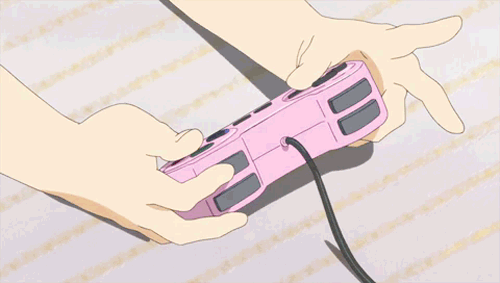

# Dataset

https://www.kaggle.com/datasets/gregorut/videogamesales/data

#About the Dataset 🔍¶
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

##Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


#Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [ ]:
df_data=pd.read_csv("/content/vgsales.csv")
df_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data PreProcessing

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df_data.shape

(16598, 11)

In [ ]:
df_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Initial Findings
- Dataset has a shape of 11 columns and 16698 rows
- Columns display video game sales data in NA, EU, Japan and Other areas between years 1980 and 2020
- NA region has the highest sales among EU, Japan and other areas

In [ ]:
df_data['Year'].value_counts()

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


- Since the data for 2017 includes only 3 games, and there's no data for 2018 and 2019, while 2020 has just one game, we'll consider the data from 1980 to 2016 only.

In [ ]:
df_data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Cleaning Requirements
- Year column has 271 null values
- Publisher column has 58 null values
- Year data type is float64
- Drop Years from 2017 to 2020


- Game with null values consists of approximately 2% of the data. Since it is comparable to a lower rate, we can drop these rows.

In [ ]:
df_data_clean=df_data.dropna()

In [ ]:
df_data_clean.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df_data_clean["Year"] = df_data_clean['Year'].astype(int)


<ipython-input-10-5c53228605c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean["Year"] = df_data_clean['Year'].astype(int)


In [ ]:
years_to_remove = df_data_clean["Year"].value_counts().tail(2).index

df_data_clean = df_data_clean[~df_data_clean["Year"].isin(years_to_remove)]


In [ ]:
df_data_clean["Year"].value_counts().tail()

,count
Year,
1990,16
1988,15
1985,14
1984,14
1980,9


In [ ]:
df_data_clean.duplicated().sum()

0

In [ ]:
df_data_clean['Platform']=df_data_clean['Platform'].str.upper()
df_data_clean['Genre']=df_data_clean['Genre'].str.title()

- The first line converts all platform names to uppercase, ensuring that entries like "ps4" and "PS4" are treated as the same value.
- The second line converts all genre names to title case, so entries like "action" and "Action" are unified.

In [ ]:
uni_plat=df_data_clean['Platform'].unique()
print(f'this is the unique platform {uni_plat}\n')
print(f'this is the count of unique platform {len(uni_plat)}')

this is the unique platform ['WII' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XONE' 'GC' 'WIIU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

this is the count of unique platform 31


In [ ]:
uni_genre=df_data_clean['Genre'].unique()
print(f'unique Genre is {uni_genre} \n')
print(f'this is the count of unique Genre {len(uni_genre)}')

unique Genre is ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 

this is the count of unique Genre 12


In [ ]:
uni_publisher=df_data_clean['Publisher'].unique()
print(f'unique publisher is {uni_publisher} \n')
print(f'this is the count of unique publisher {len(uni_publisher)}')

unique publisher is ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red St

In [ ]:
df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['EA Games', 'Electronic Arts Victor', 'Electronic Arts'],
    'Electronic Arts'
)
df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['Ubisoft', 'Ubisoft Annecy'],
    'Ubisoft'
)

df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['Sony Computer Entertainment', 'Sony Computer Entertainment Europe','Sony Online Entertainment','Sony Computer Entertainment America',
     'Sony Music Entertainment'],'sony'
)

df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['SquareSoft', 'Square Enix','Square EA'],'Square'
)


df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['Activision Value', 'Activision Blizzard'],'Activision'
)

df_data_clean['Publisher'] = df_data_clean['Publisher'].replace(
    ['Warner Bros. Interactive Entertainment', 'Time Warner Interactive'],'Warner'
)


- Variations of publishers like Electronic Arts, Sony, Ubisoft, Square, Activision, and Warner are merged into a single consistent name.
- This removes redundancy, ensures consistency, and improves the accuracy of grouping and analysis related to publishers.

In [ ]:
uni_publisher=df_data_clean['Publisher'].unique()
print(f'unique publisher is {uni_publisher} \n')
print(f'this is the count of unique publisher {len(uni_publisher)}')

unique publisher is ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive' 'sony'
 'Activision' 'Ubisoft' 'Bethesda Softworks' 'Electronic Arts' 'Sega'
 'Square' 'Atari' '505 Games' 'Capcom' 'GT Interactive'
 'Konami Digital Entertainment' 'LucasArts' 'Virgin Interactive' 'Warner'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Valve' 'Banpresto' 'D3Publisher'
 'Oxygen Interactive' 'Red Storm Entertainment' 'Video System'
 'Hello Games' 'Global Star' 'Gotham Games' 'Westwood Studios' 'GungHo'
 'Crave Entertainment' 'Hudson Sof

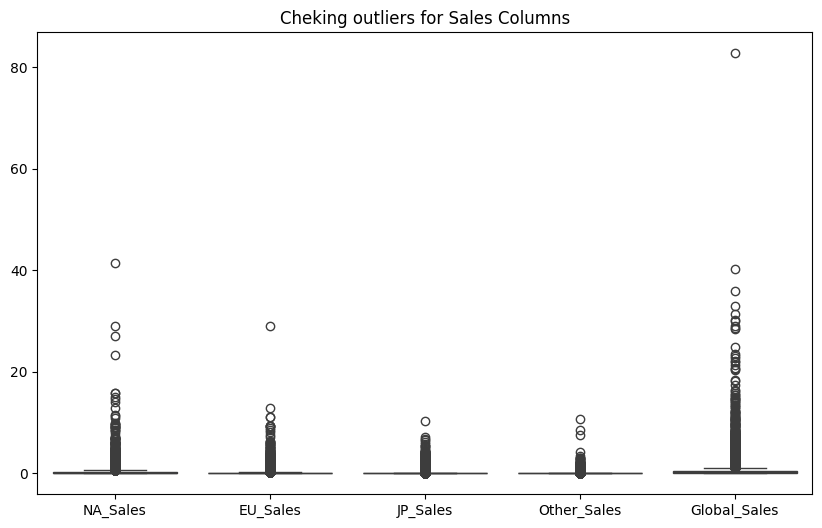

In [ ]:
#check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_data_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.title("Cheking outliers for Sales Columns")
plt.show()

- These outliers are valuable for identifying key success drivers and should be leveraged for strategic analysis rather than being disregarded.

#EDA

In [ ]:
df_data_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,WII,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,WII,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,WII,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


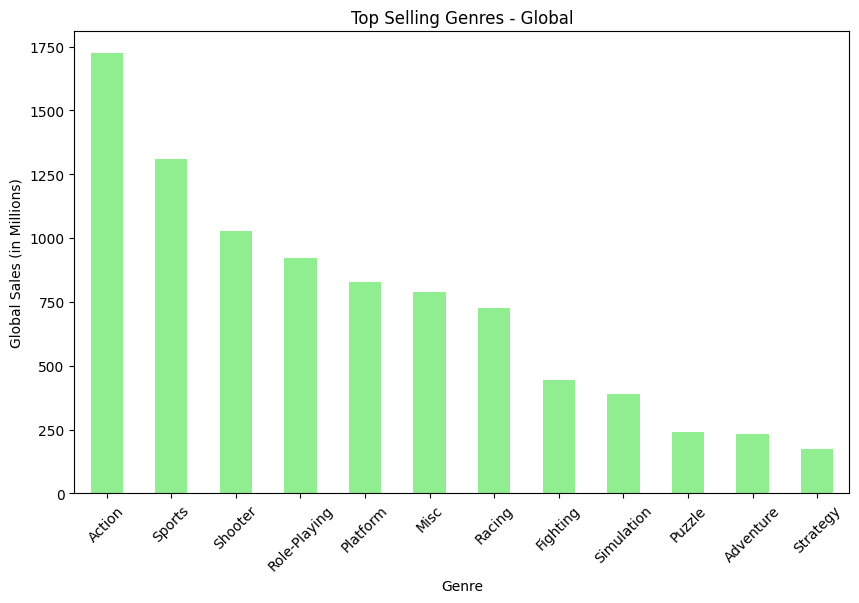

In [ ]:
top_genres_global = df_data_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_genres_global.plot(kind='bar', color='lightgreen')
plt.title('Top Selling Genres - Global')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

- Action , Sports and Shooter games dominate global sales, suggesting they cater to broader audiences or have consistent demand.
- Developers may consider focusing on these top-performing genres for higher market impact, while niche genres might offer opportunities for targeted innovation.

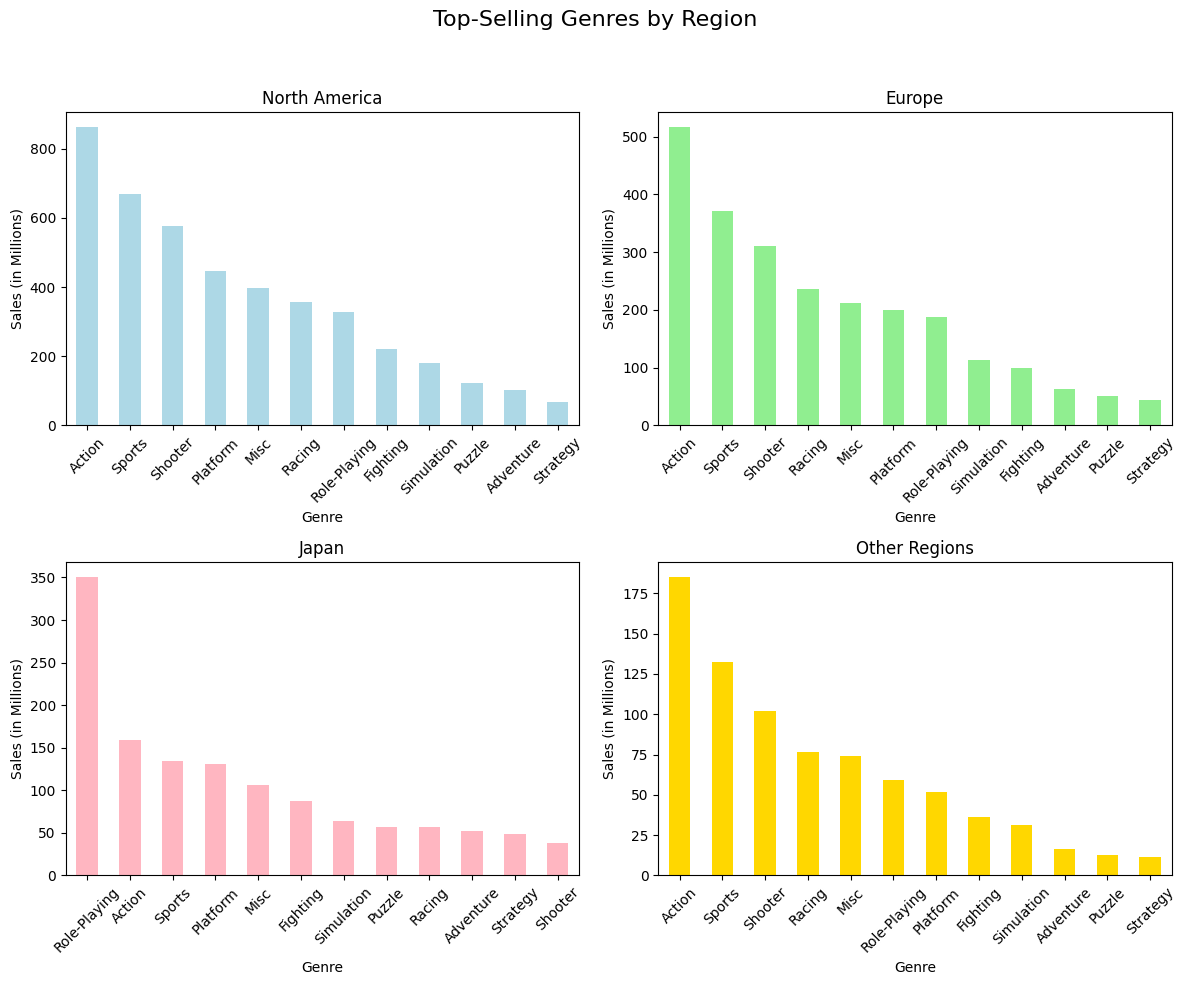

In [ ]:
regional_genres = df_data_clean.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top-Selling Genres by Region", fontsize=16)

regional_genres['NA_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0], color='lightblue', title='North America')
regional_genres['EU_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1], color='lightgreen', title='Europe')
regional_genres['JP_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 0], color='lightpink', title='Japan')
regional_genres['Other_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1], color='gold', title='Other Regions')

for ax in axes.flat:
    ax.set_xlabel("Genre")
    ax.set_ylabel("Sales (in Millions)")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Action and Sports genres are universally popular except in Japan, where Role-Playing dominates.
- Shooter is strong in NA and Europe but weak in Japan.
- Strategy and Puzzle genres have limited appeal across all regions.

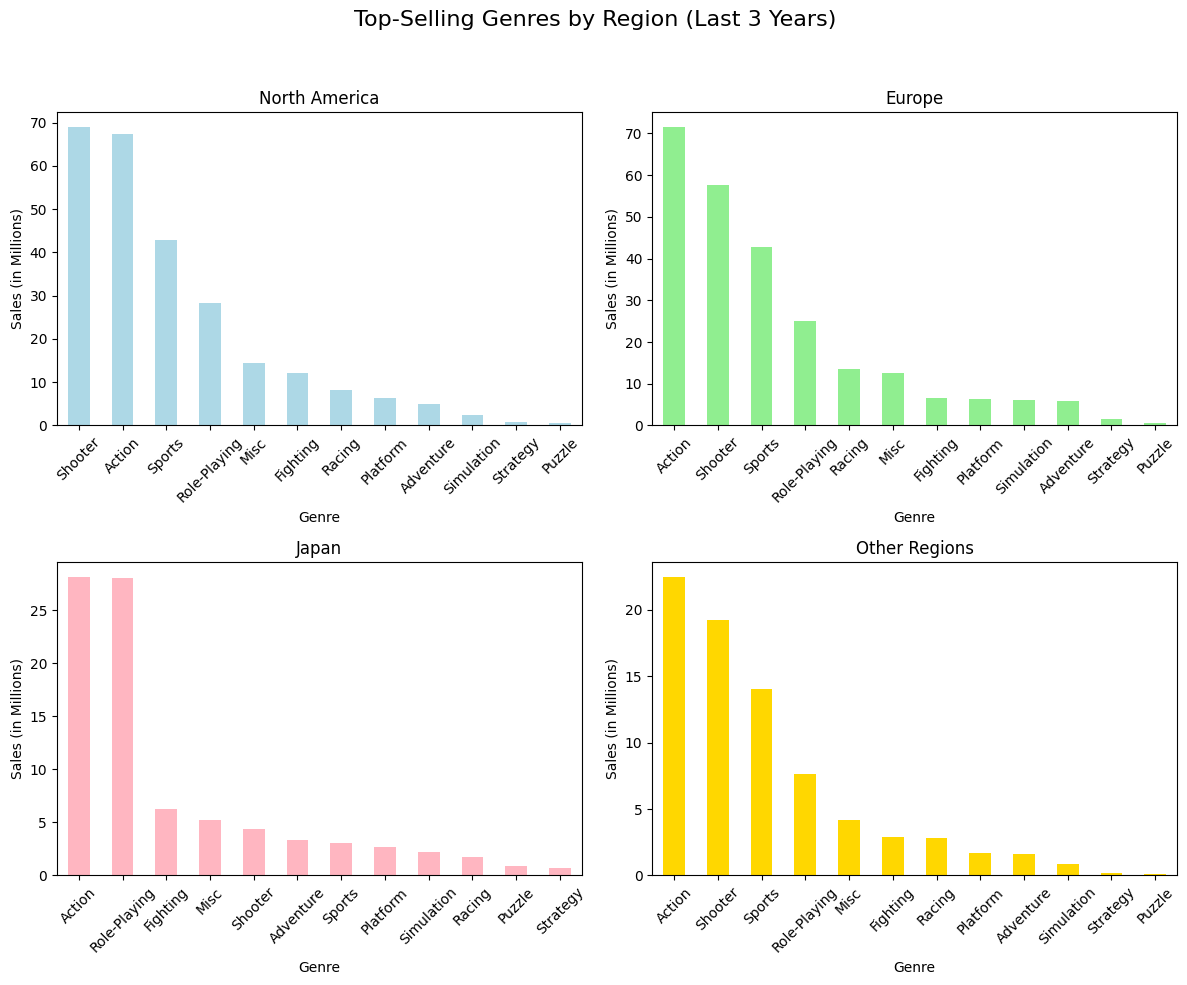

In [ ]:
# Filter data for the last 3 years (2014-2016)
last_three_years = df_data_clean[df_data_clean['Year'].between(2014, 2016)]

# Group by genre and sum sales for each region
regional_genres_last_three_years = last_three_years.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top-Selling Genres by Region (Last 3 Years)", fontsize=16)

# Plot sales for each region
regional_genres_last_three_years['NA_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0], color='lightblue', title='North America')
regional_genres_last_three_years['EU_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1], color='lightgreen', title='Europe')
regional_genres_last_three_years['JP_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 0], color='lightpink', title='Japan')
regional_genres_last_three_years['Other_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1], color='gold', title='Other Regions')

# Set labels and ticks for each subplot
for ax in axes.flat:
    ax.set_xlabel("Genre")
    ax.set_ylabel("Sales (in Millions)")
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- In the last 3 years, Shooter games have gained significant popularity in North America and Europe.
- Action remains a universally popular genre, while Role-Playing maintains its stronghold in Japan.
- Strategy and Puzzle continue to have minimal appeal globally.

<ipython-input-25-850e8080e7a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms_global, y=top_platforms_global.index, palette='magma')


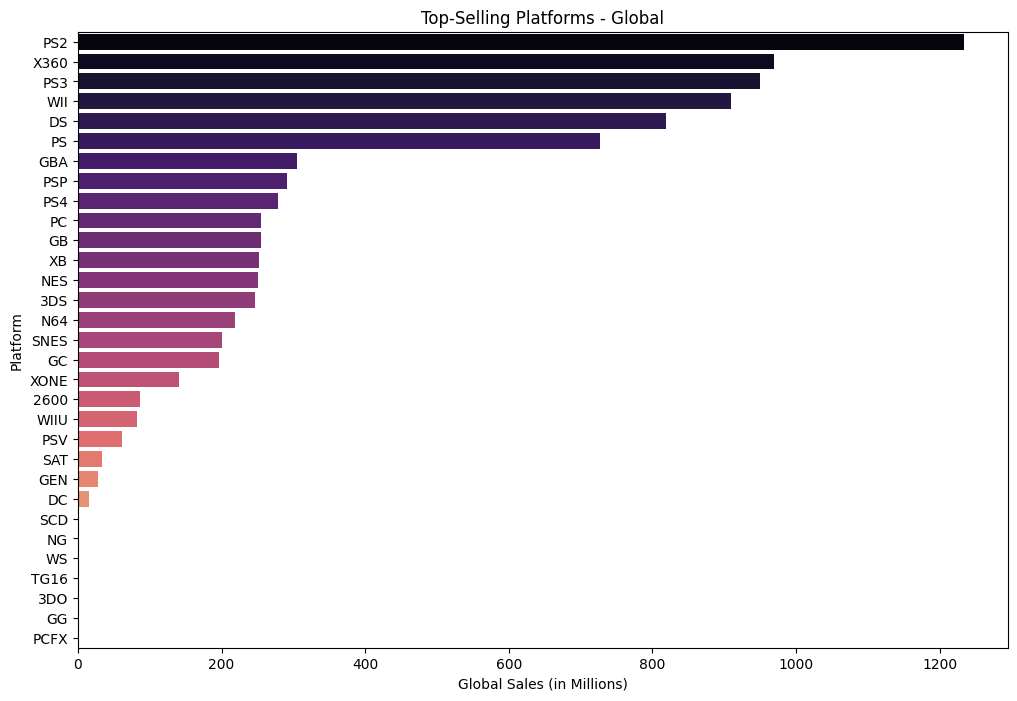

In [ ]:
top_platforms_global = df_data_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_platforms_global, y=top_platforms_global.index, palette='magma')
plt.title("Top-Selling Platforms - Global")
plt.xlabel("Global Sales (in Millions)")
plt.ylabel("Platform")
plt.show()



- The PS2 stands out as a key success story, likely due to its extensive game library and long market presence.
- Developers targeting highly active user bases should focus on platforms like PlayStation and Nintendo.
- The low sales of older or niche platforms reflect the importance of continuous innovation and market adaptation.

<ipython-input-26-e85fb08250cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms_last_5, y=top_platforms_last_5.index, palette='magma')


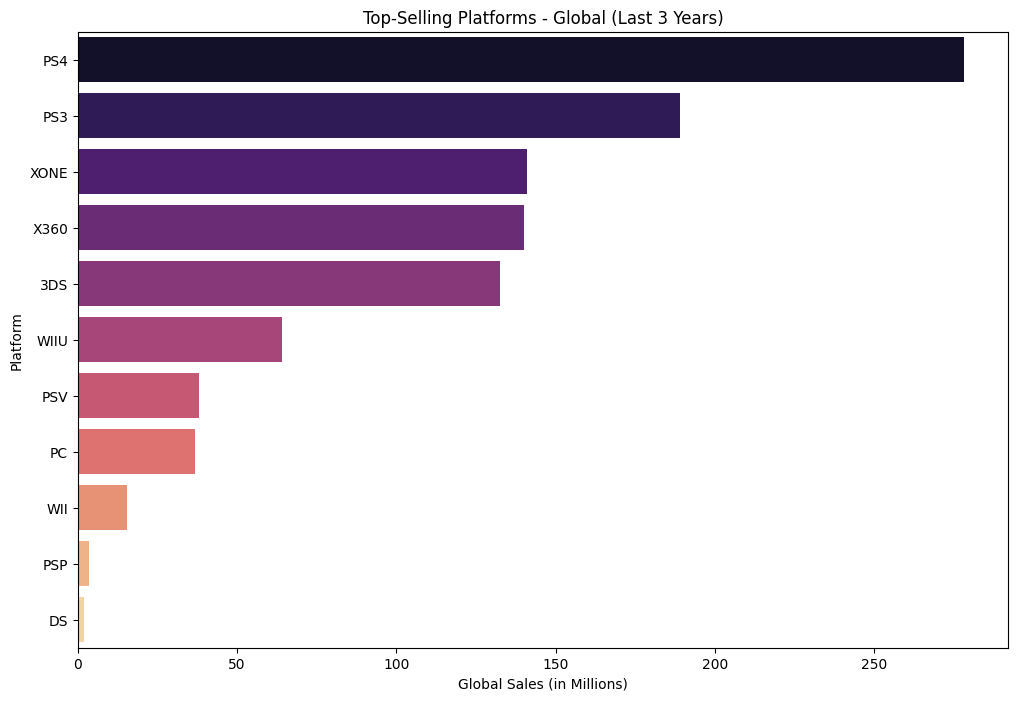

In [ ]:
df_last_5 = df_data_clean[df_data_clean['Year'] >= df_data_clean['Year'].max() -3]

top_platforms_last_5 = df_last_5.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_platforms_last_5, y=top_platforms_last_5.index, palette='magma')
plt.title("Top-Selling Platforms - Global (Last 3 Years)")
plt.xlabel("Global Sales (in Millions)")
plt.ylabel("Platform")
plt.show()

- The market is dominated by modern consoles like the PS4, with handheld devices like the 3DS maintaining a solid presence. Older platforms show a clear decline, reflecting evolving consumer preferences.

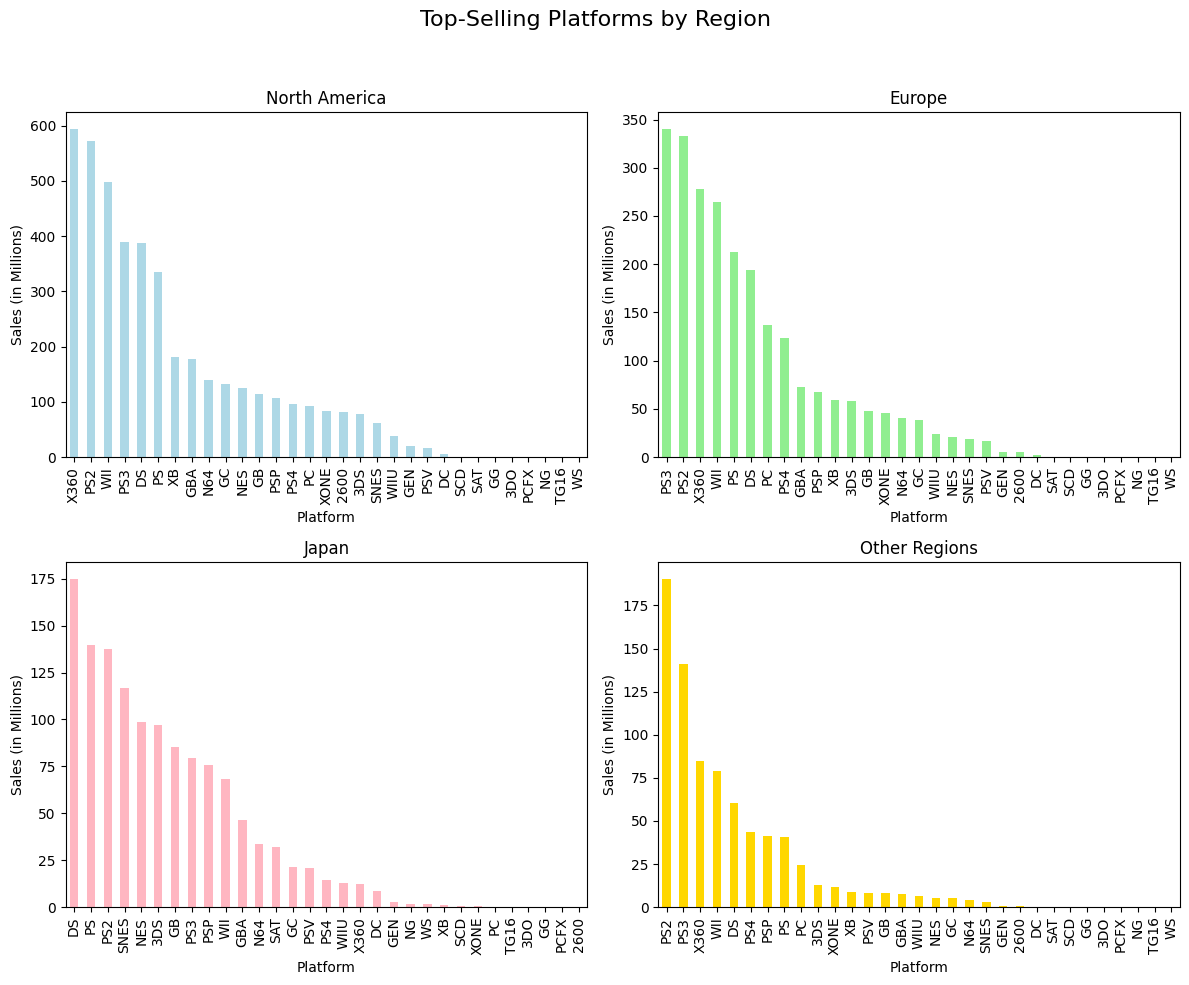

In [ ]:
regional_platforms = df_data_clean.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top-Selling Platforms by Region", fontsize=16)

regional_platforms['NA_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0], color='lightblue', title='North America')
regional_platforms['EU_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1], color='lightgreen', title='Europe')
regional_platforms['JP_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 0], color='lightpink', title='Japan')
regional_platforms['Other_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1], color='gold', title='Other Regions')

for ax in axes.flat:
    ax.set_xlabel("Platform")
    ax.set_ylabel("Sales (in Millions)")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Regional Preferences:
    - North America favors Xbox platforms, while Europe and Japan lean toward PlayStation.
    - Handhelds are particularly popular in Japan compared to other regions.
- Global Leaders:
    - PS2 and DS consistently perform well across multiple regions.
- Market Differences:
    - North America and Europe favor home consoles, while Japan prioritizes handheld devices.

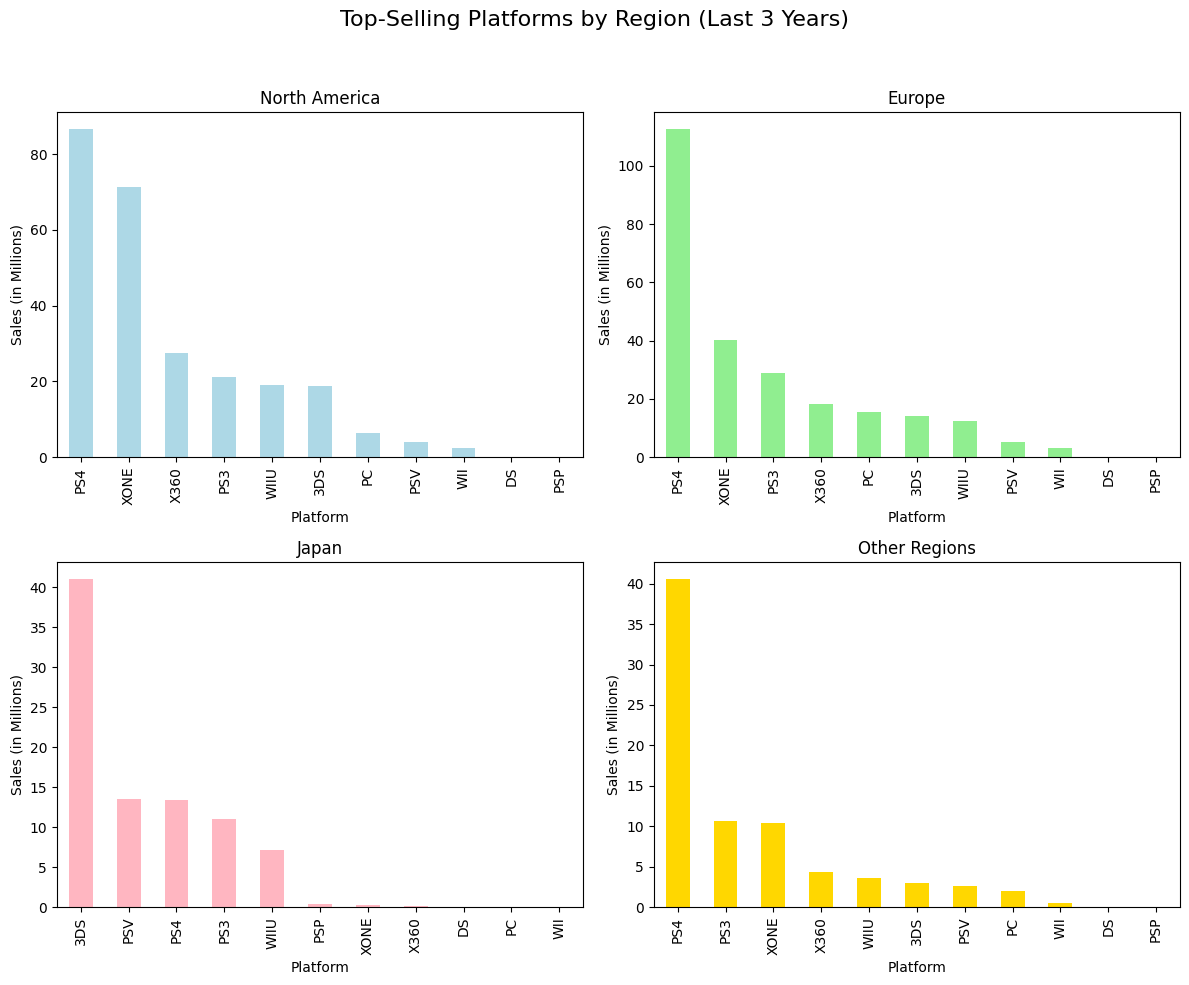

In [ ]:

# Filter data for the last 3 years (2014-2016)
last_three_years = df_data_clean[df_data_clean['Year'].between(2014, 2016)]

# Group by platform and sum sales for each region
regional_platforms_last_three_years = last_three_years.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top-Selling Platforms by Region (Last 3 Years)", fontsize=16)

# Plot sales for each region
regional_platforms_last_three_years['NA_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0], color='lightblue', title='North America')
regional_platforms_last_three_years['EU_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1], color='lightgreen', title='Europe')
regional_platforms_last_three_years['JP_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 0], color='lightpink', title='Japan')
regional_platforms_last_three_years['Other_Sales'].sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1], color='gold', title='Other Regions')

# Set labels and ticks for each subplot
for ax in axes.flat:
    ax.set_xlabel("Platform")
    ax.set_ylabel("Sales (in Millions)")
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- PS4 is the top-performing platform across all regions except Japan, where 3DS leads.
- Handheld platforms dominate in Japan but have less traction in North America and Europe.
- Xbox platforms have a strong presence in North America but perform poorly in Japan.
- The decline of older platforms like Wii, DS, and PSP is consistent across all regions.

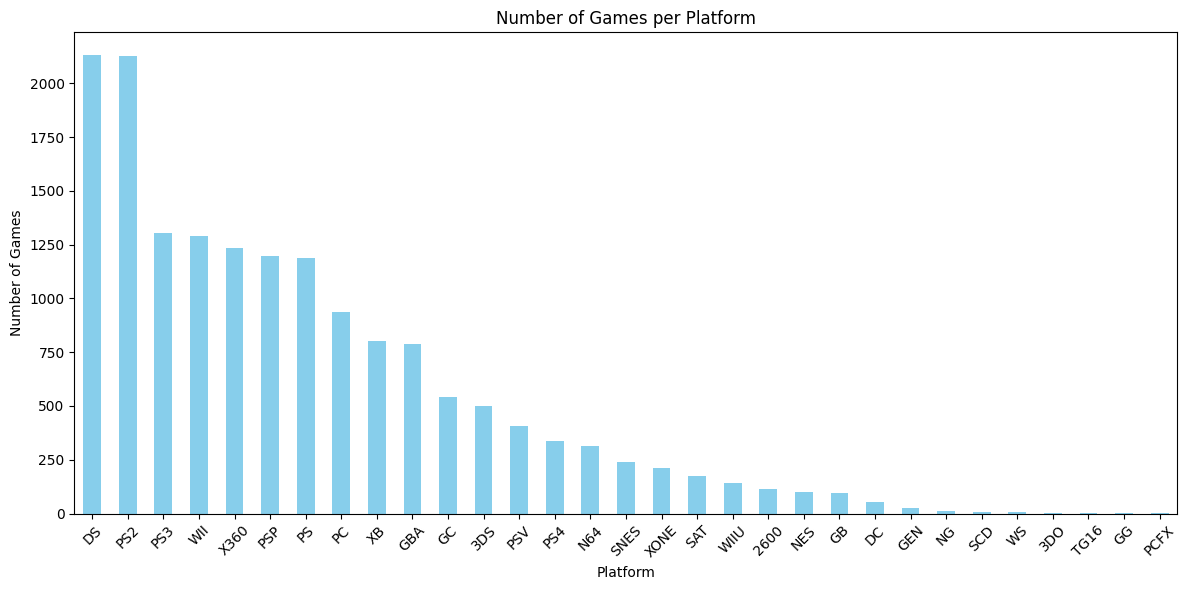

In [ ]:
platform_game_counts = df_data_clean['Platform'].value_counts()
plt.figure(figsize=(12, 6))
platform_game_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Platform')
plt.xlabel('Platform') # x-axis label
plt.ylabel('Number of Games') # y-axis label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The platforms with the largest game libraries (DS, PS2, PS3, Wii) were successful due to strong market adoption and long support periods.
- Handheld devices like DS, PSP, and GBA demonstrate significant developer interest, especially in regions like Japan.
- Newer platforms like PS4 and XONE had growing libraries, indicating an evolving market with higher development costs and longer game production cycles.

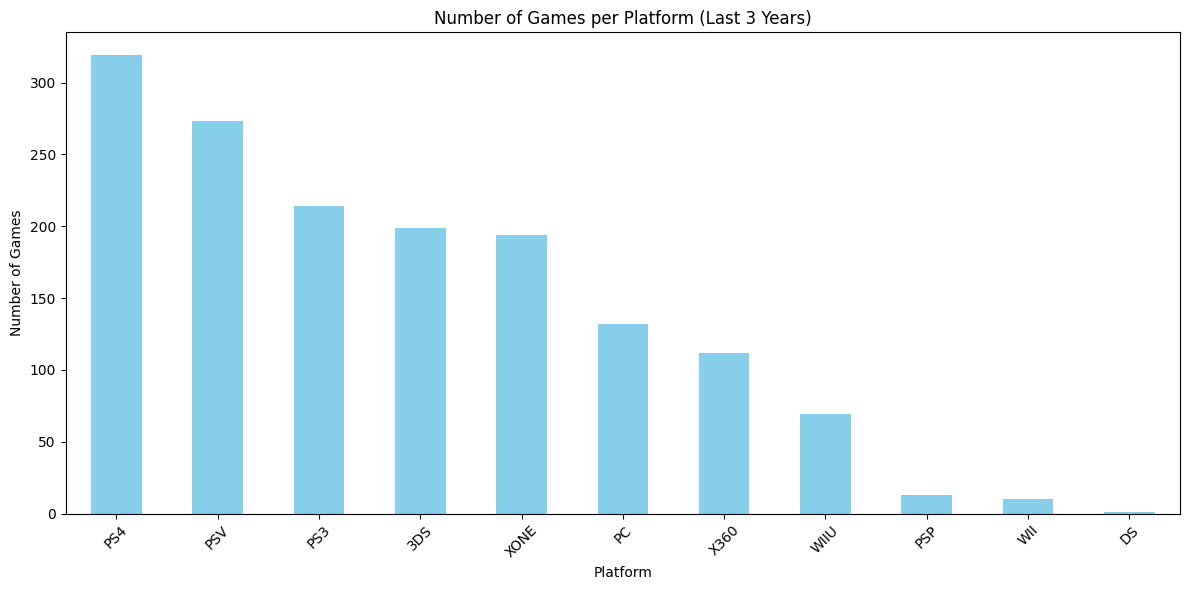

In [ ]:
# Filter data for the last 3 years (2014-2016)
last_three_years = df_data_clean[df_data_clean['Year'].between(2014, 2016)]

# Calculate platform game counts for the last 3 years
platform_game_counts_last_3_years = last_three_years['Platform'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
platform_game_counts_last_3_years.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Platform (Last 3 Years)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The PS4 leads in terms of game development, emphasizing its position as the dominant platform.
- Handheld platforms like PSV and 3DS continue to have strong game libraries, particularly in regions like Japan.
- Older platforms like PSP, Wii, and DS are transitioning out of active development, making way for newer systems.

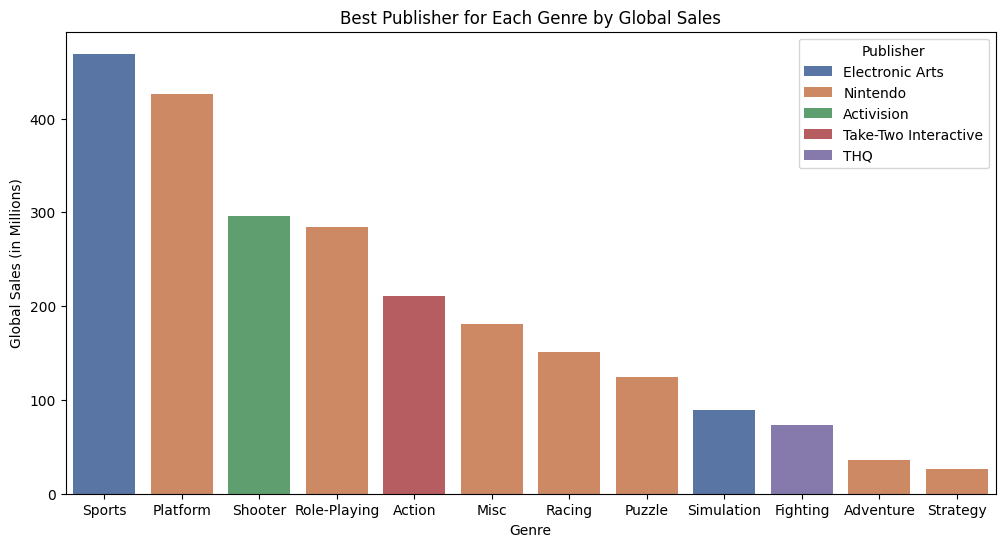

In [ ]:
genre_publisher_sales = df_data_clean.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()

best_publishers = genre_publisher_sales.loc[genre_publisher_sales.groupby('Genre')['Global_Sales'].idxmax()]

best_publishers = best_publishers.sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', hue='Publisher', data=best_publishers, palette='deep')
plt.title('Best Publisher for Each Genre by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Millions)')
plt.show()

 Nintendo and Electronic Arts dominate multiple genres, highlighting their extensive reach and successful franchises.
- Activision and Take-Two Interactive excel in specific, high-revenue genres, such as Shooter and Action.
-Publishers can expand into less competitive genres or strengthen their hold in dominant categories to maximize sales.
- Less competitive genres like Adventure and Strategy may present opportunities for emerging publishers to establish a foothold in the market.

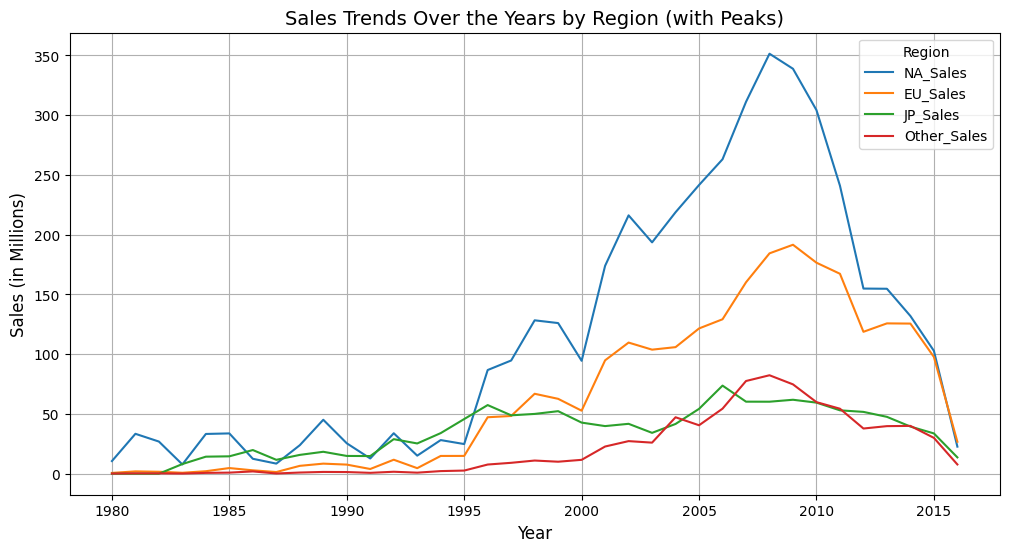

In [ ]:
regional_sales_trends = df_data_clean.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

regional_sales_melted = regional_sales_trends.melt(id_vars='Year',
                                                   value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                                   var_name='Region',
                                                   value_name='Sales')

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_sales_melted, x='Year', y='Sales', hue='Region', palette='tab10')


plt.title("Sales Trends Over the Years by Region (with Peaks)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales (in Millions)", fontsize=12)
plt.grid(True)
plt.legend(title="Region", fontsize=10)
plt.show()

- North America and Europe remain the largest markets for video games, making them key targets for publishers and developers.
- Japan and Other Regions show steady sales, indicating opportunities for niche markets or targeted strategies.
- The post-2010 decline in physical sales highlights the need to investigate digital distribution trends, which may account for the drop in traditional sales.


Correlation Matrix:
             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.768921  0.451279     0.634514
EU_Sales     0.768921  1.000000  0.436371     0.726252
JP_Sales     0.451279  0.436371  1.000000     0.290551
Other_Sales  0.634514  0.726252  0.290551     1.000000


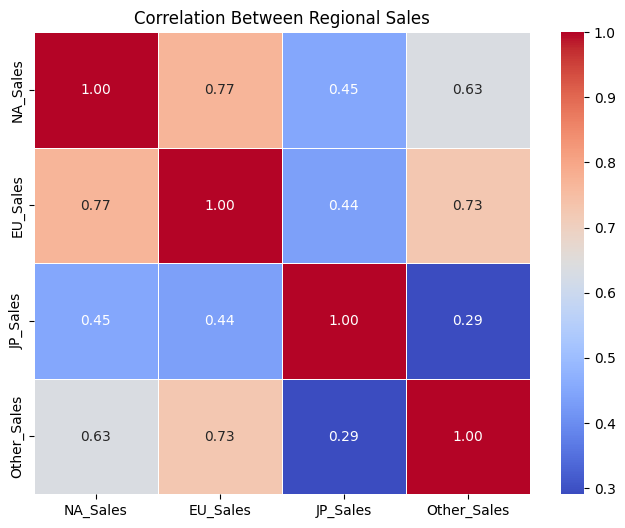

In [ ]:
correlation = df_data_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Regional Sales")
plt.show()

- Strong Correlation Between North America and Europe.
  - Developers should target North America and Europe together, as their preferences align strongly.
- Weaker Correlation with Japan.
  - Japan requires separate strategies due to its unique market dynamics.